# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from datetime import datetime

from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize']=[15,7]

# Reading Data

In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Information about the Data

In [3]:
df.shape

(244, 7)

In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Missing Values

In [7]:
df.isnull().sum()

# no missing values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Univariate Analysis

In [8]:
df.select_dtypes(include=np.number).columns

Index(['total_bill', 'tip', 'size'], dtype='object')

## 1.total_bill

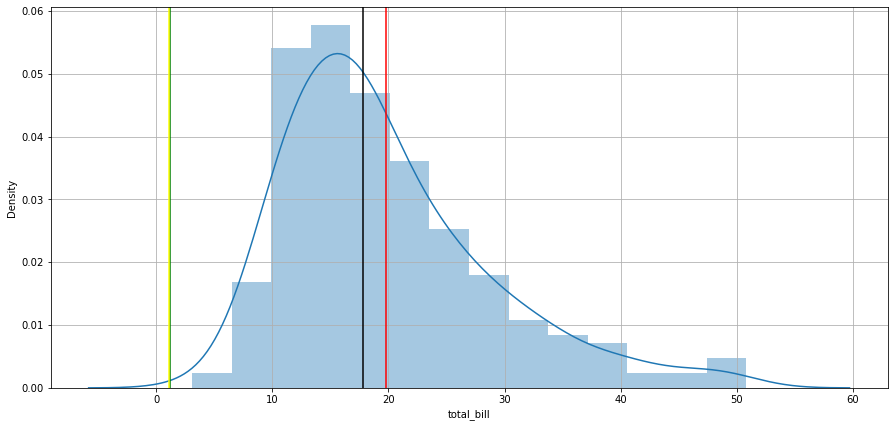

In [9]:
sns.distplot(df.total_bill)
plt.axvline(df.total_bill.mean(),color='red')
plt.axvline(df.total_bill.median(),color='black')
plt.axvline(df.total_bill.kurt(),color='green')
plt.axvline(df.total_bill.skew(),color='yellow')
plt.grid()
plt.show()

In [10]:
df.total_bill.kurt(),df.total_bill.skew()

(1.2184840156638854, 1.1332130376158205)

In [11]:
df.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='total_bill'>

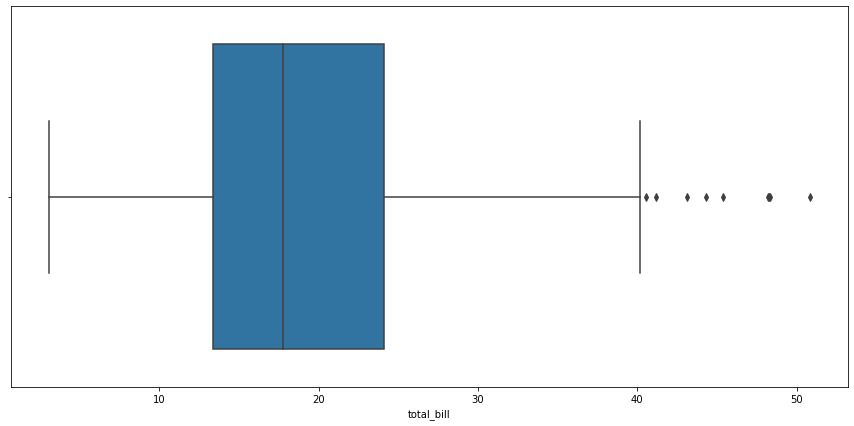

In [12]:
# checking outlier for total_bill

sns.boxplot(df.total_bill)

## **Inferences**: 
                   * Outliers are present in total_bill column.
                   * Max people paying between 10 to 20. 
                   * Total_bill is platykurtosis(negavtive kurtosis kurt<3) in nature.
                   * It is right skewed.

## 2. Tip

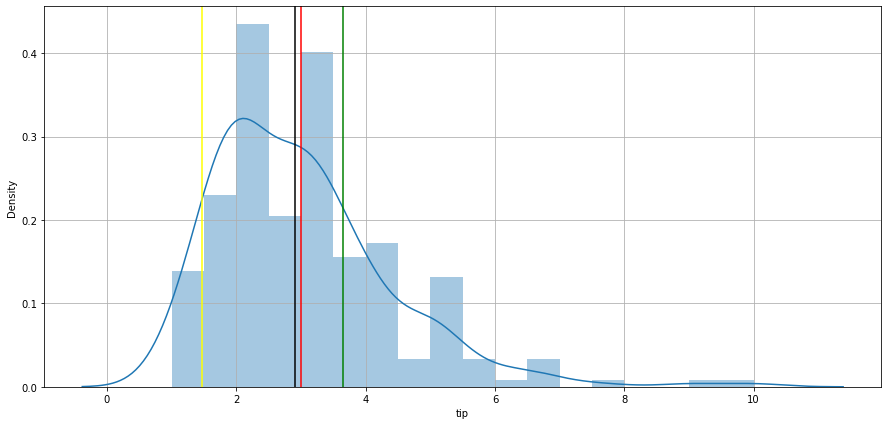

In [13]:
sns.distplot(df.tip)
plt.axvline(df.tip.mean(),color='red')
plt.axvline(df.tip.median(),color='black')
plt.axvline(df.tip.kurt(),color='green')
plt.axvline(df.tip.skew(),color='yellow')
plt.grid()
plt.show()

In [14]:
df.tip.kurt(), df.tip.skew()

(3.648375873352852, 1.4654510370979401)

In [15]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:xlabel='tip'>

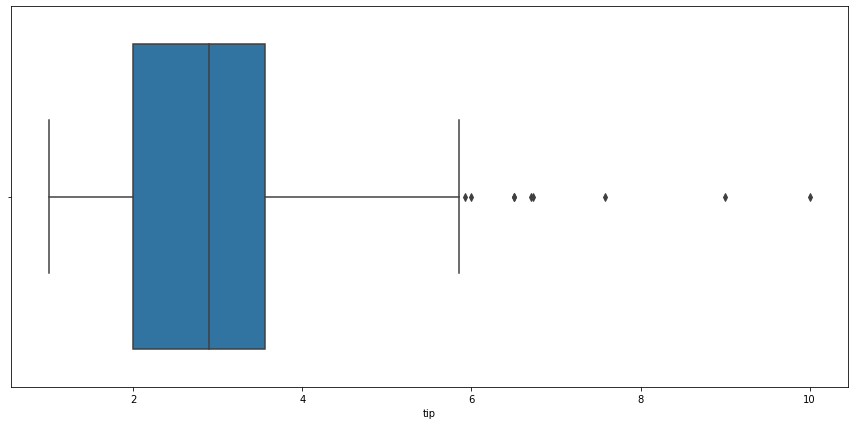

In [16]:
# checking outlier for tip

sns.boxplot(df.tip)

## **Inferences**:
                * Most of the people giving tips around 2.
                * Outliers are present means some people are giving 10 as tip which is maximum tip.
                * Tip is right skewed and Leptokurtic (positive kurtosis, kurt>3).

## 3.Size

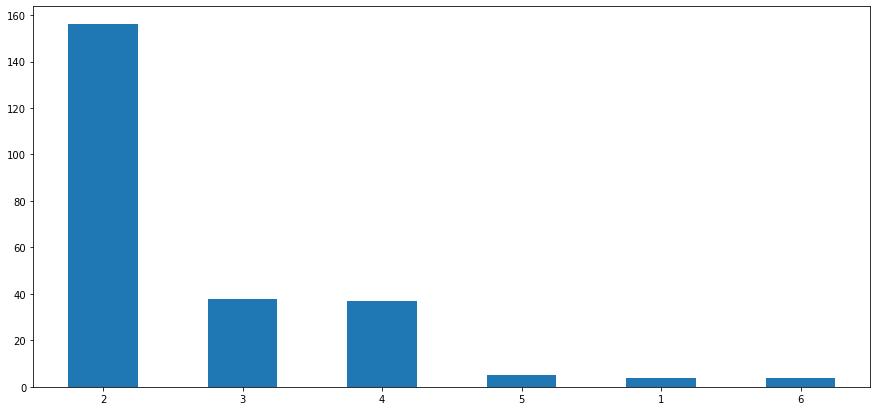

In [17]:
df['size'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

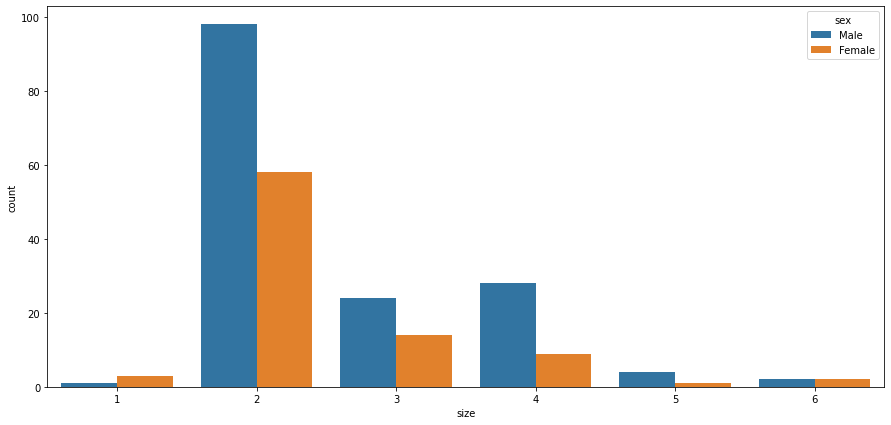

In [18]:
sns.countplot(x='size',data=df,hue='sex')
plt.show()


### Table size for two people is most preferred.

In [19]:
# Categorical columns 

df.select_dtypes(include='category').columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

## 4.sex

In [20]:
df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [21]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

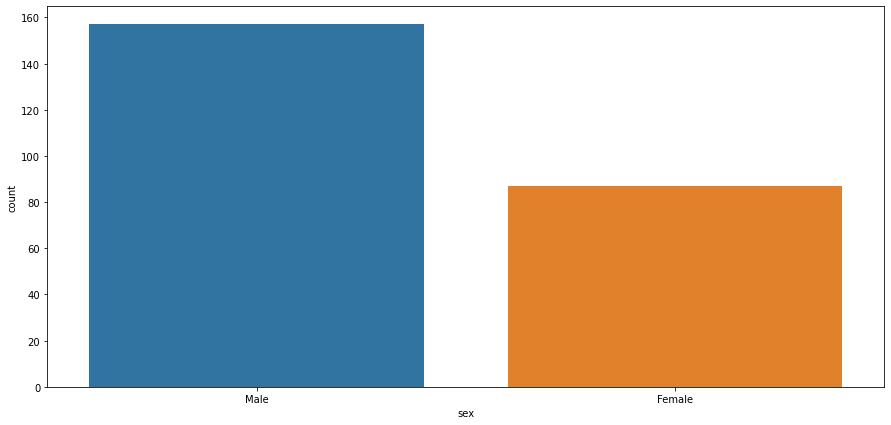

In [22]:
sns.countplot(df.sex)
plt.xticks(rotation=0)
plt.show()

### Males visited restaurants are more than that of females.

## 5.Smoker

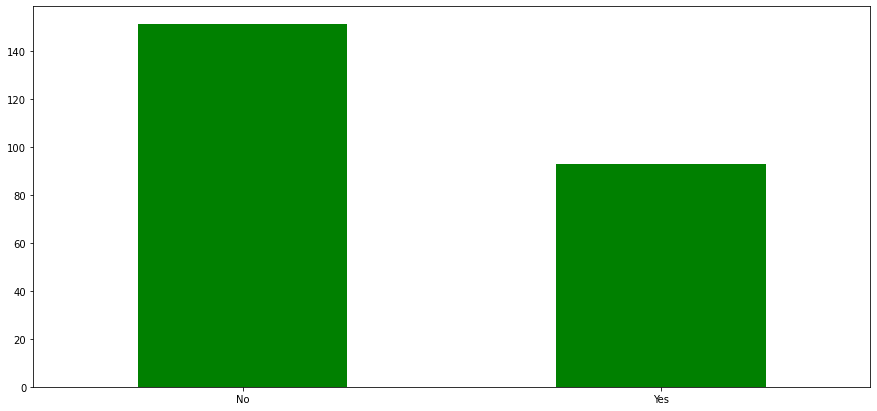

In [23]:
df.smoker.value_counts().plot.bar(color='green')
plt.xticks(rotation=0)
plt.show()

### More non_smokers visited restaurants.

## 6.day

In [24]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

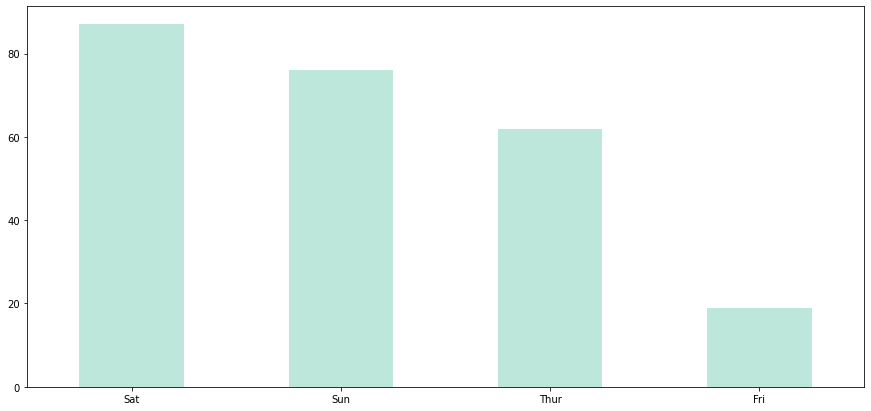

In [25]:
df.day.value_counts().plot(kind='bar',colormap='icefire')
plt.xticks(rotation=0)
plt.show()

### Saturday is the busiest day, followed by Sunday.

## 7. Time

In [26]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

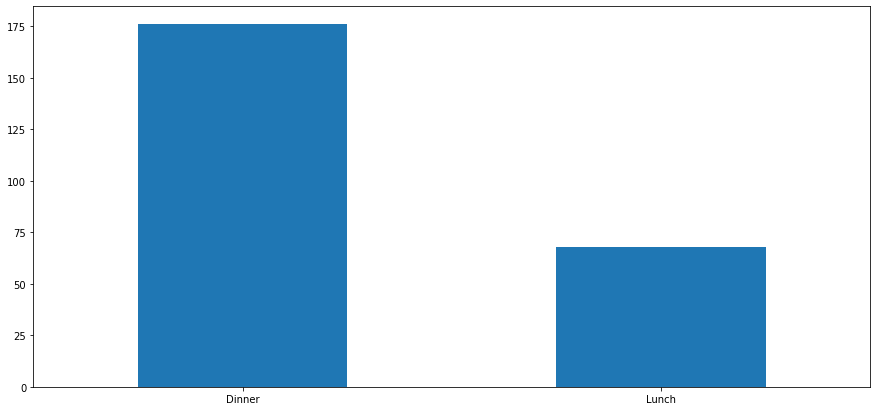

In [27]:
df.time.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

### Dinner time is most preferred time.

# Bivariate Analysis

## Target Variable is Tip

### Total_Bill Vs Tip

In [28]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

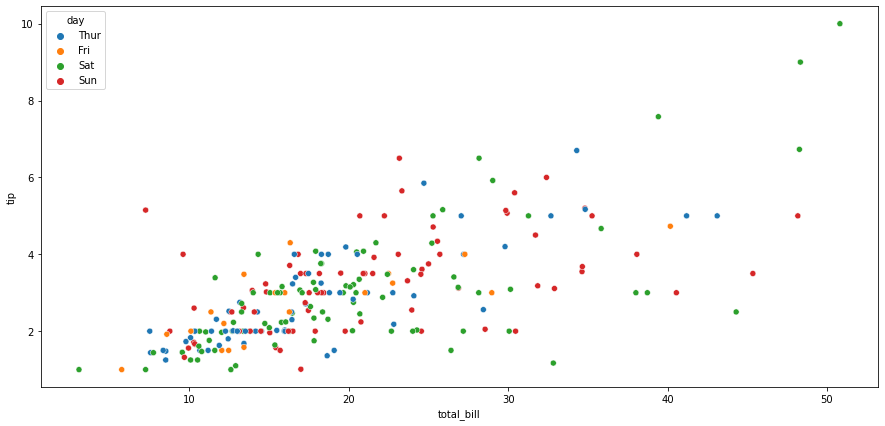

In [29]:
sns.scatterplot(df.total_bill,df.tip,hue=df.day,markers='O-')
plt.show()

### Higher the total bill, higher is tip.

### Sex Vs Tip

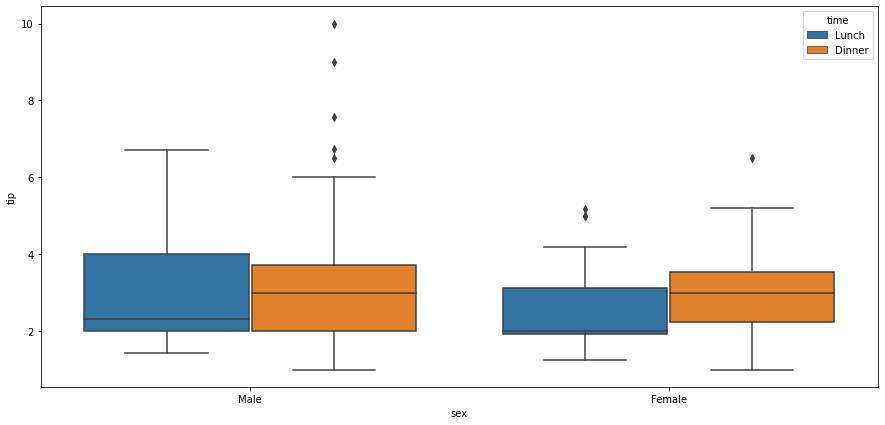

In [30]:
sns.boxplot(df.sex,df.tip,hue=df.time)
plt.show()

### Maximum amount of tip is given by male at dinner time.

### Smoker Vs Tip

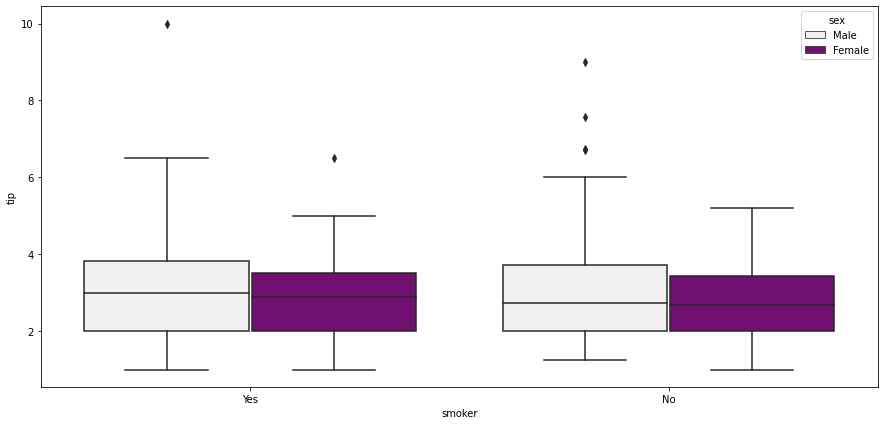

In [31]:
sns.boxplot(df.smoker,df.tip,hue=df.sex,color='purple')
plt.show()

### Maximum amount of tip is given by a male smoker.

### day Vs tip

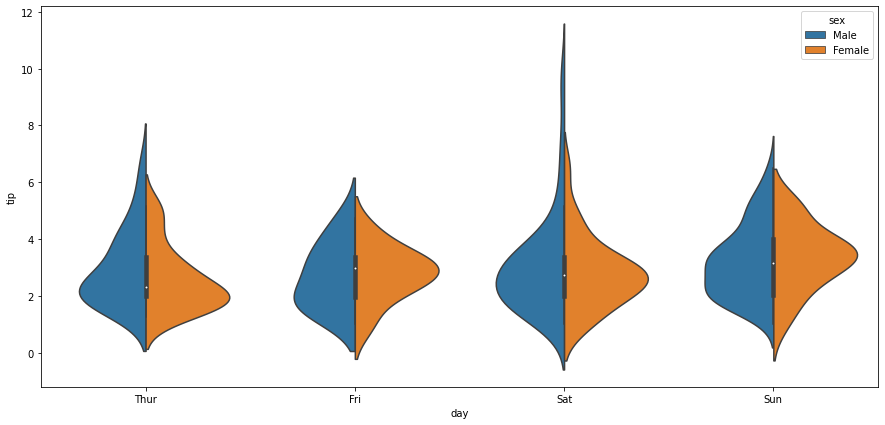

In [32]:
sns.violinplot(df.day,df.tip,hue=df.sex,split=True)
plt.show()

### Time Vs Tip

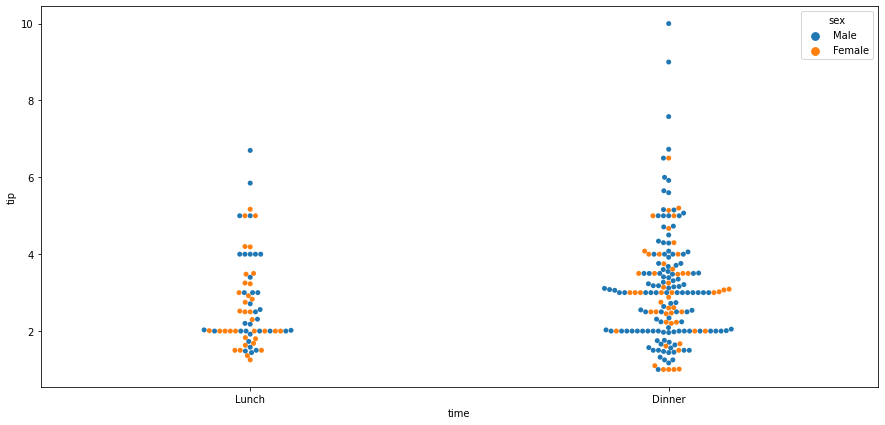

In [33]:
sns.swarmplot(df.time,df.tip,hue=df.sex)
plt.show()

### Size Vs Tip

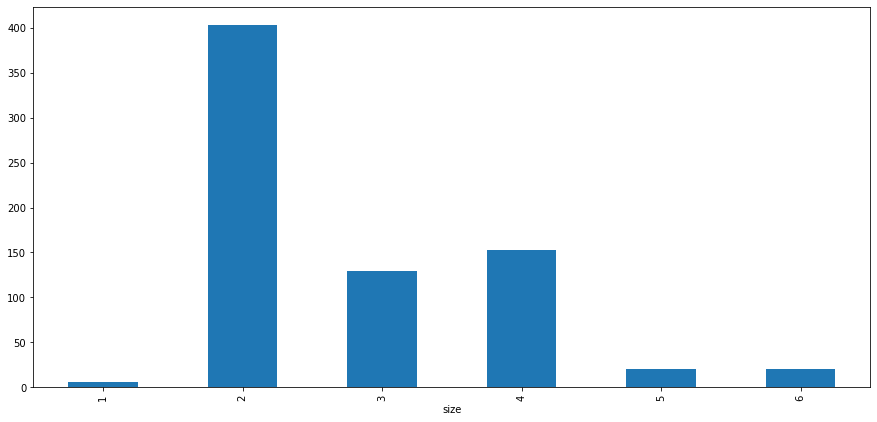

In [34]:
df.groupby('size')['tip'].sum().plot(kind='bar')
plt.show()

### tip depends on size..collection of tip from size 2 is highest.

## Correlation

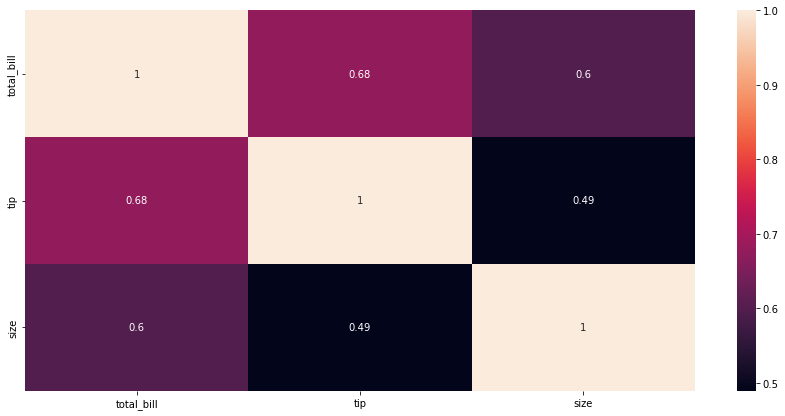

<Figure size 360x360 with 0 Axes>

In [35]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(5,5))
plt.show()

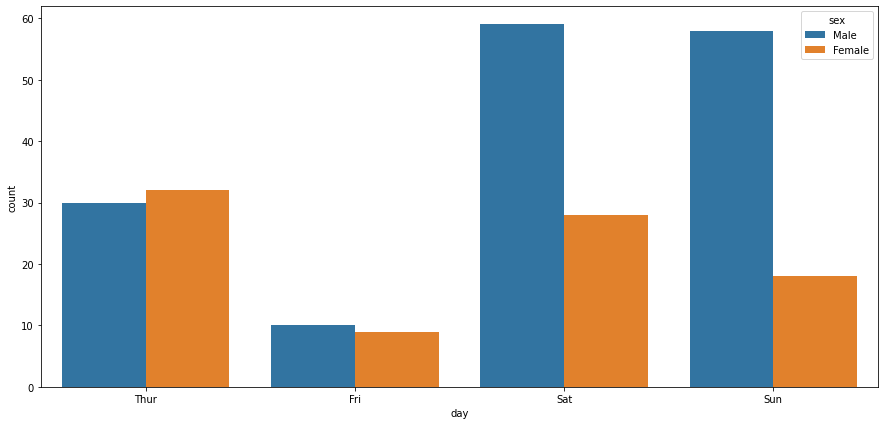

In [36]:
sns.countplot(x='day',data=df,hue='sex')
plt.show()

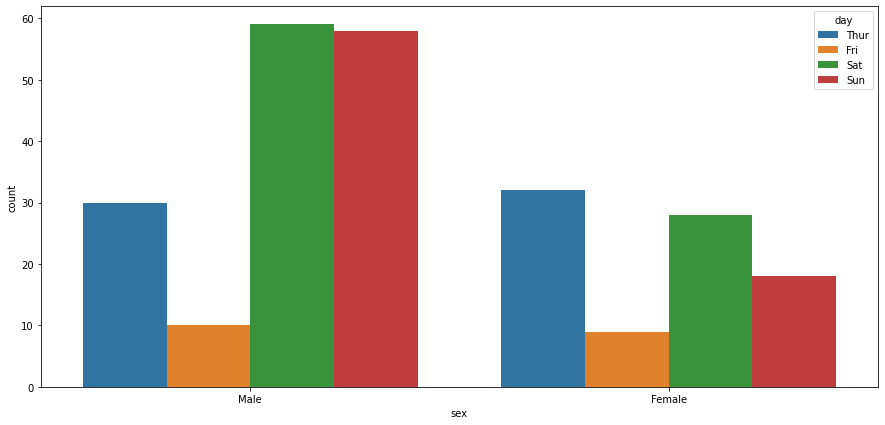

In [37]:
sns.countplot(x='sex',data=df,hue='day')
plt.show()


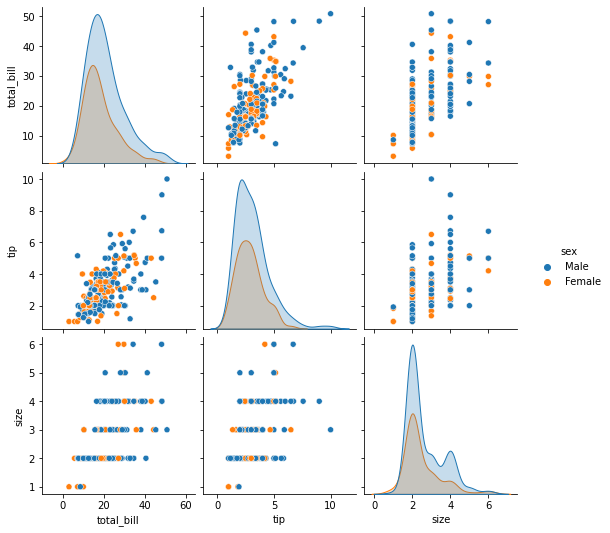

In [38]:
sns.pairplot(data=df,hue='sex')
plt.show()

In [39]:
df1=pd.DataFrame(pd.pivot_table(df,index=['sex','smoker'],aggfunc='count')['tip'])
df1

tip
sex    smoker     
Male   Yes      60
       No       97
Female Yes      33
       No       54

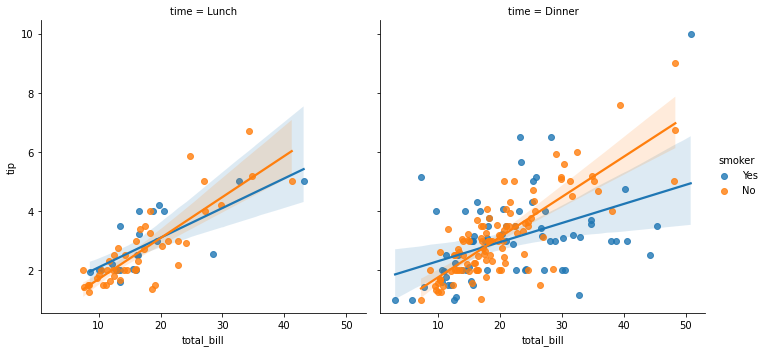

In [40]:
sns.lmplot(data=df, x="total_bill", y="tip", col="time", hue="smoker")

### most of the people giving tip between 2-3.

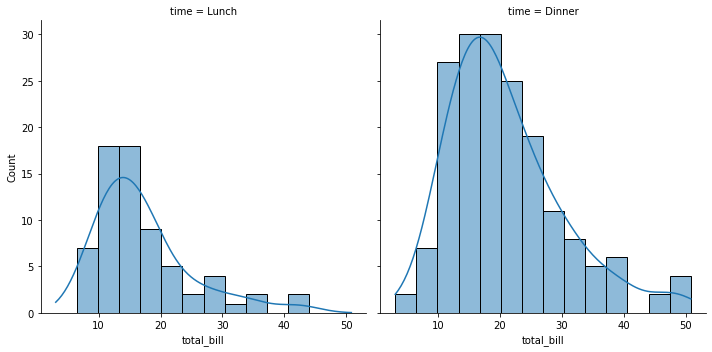

In [41]:
sns.displot(data=df, x="total_bill", col="time", kde=True)

## **Inferences**:
                 * Dinner time is on Saturday followed by Sunday is the busiest time.
                 * Maximum amount of tip is given by a men smoker at dinner time.

# Feature Engineering

In [42]:
df['sex_labled']=df['sex'].replace({'Male':0,'Female':1})

In [43]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_labled
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [44]:
df['smoker_labled']=df['smoker'].replace({'No':0,'Yes':1})

In [45]:
df['time_labled']=df['time'].replace({'Lunch':0,'Dinner':1})

In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_labled,smoker_labled,time_labled
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


In [47]:
df=df.drop(['sex','smoker','time'],axis=1)

In [48]:
df.head()

,total_bill,tip,day,size,sex_labled,smoker_labled,time_labled
0,16.99,1.01,Sun,2,1,0,1
1,10.34,1.66,Sun,3,0,0,1
2,21.01,3.50,Sun,3,0,0,1
3,23.68,3.31,Sun,2,0,0,1
4,24.59,3.61,Sun,4,1,0,1


In [49]:
df=pd.get_dummies(df,drop_first=True)

In [50]:
df.head()

,total_bill,tip,size,sex_labled,smoker_labled,time_labled,day_Fri,day_Sat,day_Sun
0,16.99,1.01,2,1,0,1,0,0,1
1,10.34,1.66,3,0,0,1,0,0,1
2,21.01,3.50,3,0,0,1,0,0,1
3,23.68,3.31,2,0,0,1,0,0,1
4,24.59,3.61,4,1,0,1,0,0,1


## Outliers

<AxesSubplot:>

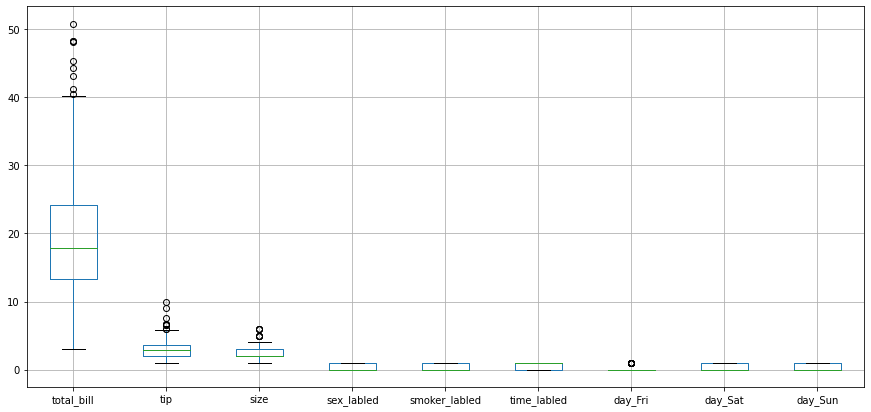

In [51]:
df.boxplot()

In [52]:
q1=np.quantile(df.total_bill,0.25) 
q3=np.quantile(df.total_bill,0.75) 
iqr=q3-q1
print('lower limit is ',q1-iqr*q3)
print('upper limit is ',q3+iqr*q1)
print('inter quantile range is ',iqr)

lower limit is  -246.74694999999994
upper limit is  168.01354999999998
inter quantile range is  10.779999999999998


# Outlier Treatment

In [53]:
for i in df.select_dtypes(include=np.number).columns:
    Q3,Q1=np.quantile(df[i],[0.75,0.25])
    IQR=Q3-Q1
    UL=Q3+(1.5*IQR)
    LL=Q1-(1.5*IQR)
    
    df.loc[df[i]>UL,i]==UL
    df.loc[df[i]<LL,i]==LL

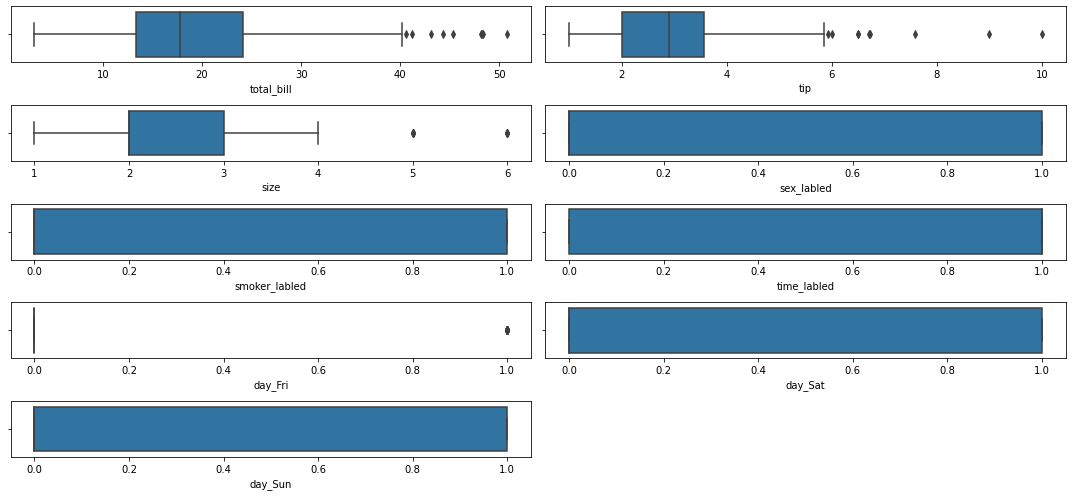

In [54]:
t=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(5,2,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

# Train Test Split

In [55]:
x=df.drop('tip',axis=1)
y=df.tip

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=2)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((195, 8), (49, 8), (195,), (49,))

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc = StandardScaler()

In [60]:
x_train_s= sc.fit_transform(x_train)

In [61]:
x_train_s = pd.DataFrame(x_train_s,columns=x_train.columns)

In [62]:
x_train_s

,total_bill,size,sex_labled,smoker_labled,time_labled,day_Fri,day_Sat,day_Sun
0,-0.356349,-0.570311,1.351328,-0.825248,-1.595448,-0.278115,-0.740013,-0.674703
1,0.019676,1.568354,-0.740013,-0.825248,0.626783,-0.278115,-0.740013,1.482134
2,2.359136,-0.570311,-0.740013,1.211757,0.626783,-0.278115,-0.740013,1.482134
3,-0.780784,-0.570311,-0.740013,-0.825248,0.626783,-0.278115,-0.740013,1.482134
4,1.216426,1.568354,-0.740013,-0.825248,0.626783,-0.278115,-0.740013,1.482134
...,...,...,...,...,...,...,...,...
190,-0.430653,-0.570311,1.351328,-0.825248,0.626783,-0.278115,1.351328,-0.674703
191,0.817884,-0.570311,1.351328,1.211757,0.626783,-0.278115,1.351328,-0.674703
192,1.490001,-0.570311,-0.740013,1.211757,0.626783,-0.278115,1.351328,-0.674703
193,0.223450,-0.570311,-0.740013,-0.825248,0.626783,-0.278115,-0.740013,1.482134


In [63]:
import statsmodels.api as sm

In [64]:
X = sm.add_constant(x_train_s)

In [65]:
X

,const,total_bill,size,sex_labled,smoker_labled,time_labled,day_Fri,day_Sat,day_Sun
0,1.0,-0.356349,-0.570311,1.351328,-0.825248,-1.595448,-0.278115,-0.740013,-0.674703
1,1.0,0.019676,1.568354,-0.740013,-0.825248,0.626783,-0.278115,-0.740013,1.482134
2,1.0,2.359136,-0.570311,-0.740013,1.211757,0.626783,-0.278115,-0.740013,1.482134
3,1.0,-0.780784,-0.570311,-0.740013,-0.825248,0.626783,-0.278115,-0.740013,1.482134
4,1.0,1.216426,1.568354,-0.740013,-0.825248,0.626783,-0.278115,-0.740013,1.482134
...,...,...,...,...,...,...,...,...,...
190,1.0,-0.430653,-0.570311,1.351328,-0.825248,0.626783,-0.278115,1.351328,-0.674703
191,1.0,0.817884,-0.570311,1.351328,1.211757,0.626783,-0.278115,1.351328,-0.674703
192,1.0,1.490001,-0.570311,-0.740013,1.211757,0.626783,-0.278115,1.351328,-0.674703
193,1.0,0.223450,-0.570311,-0.740013,-0.825248,0.626783,-0.278115,-0.740013,1.482134


In [66]:
## FIT a base model

In [69]:
y_train = y_train.reset_index()

In [70]:
y_train.drop(columns=['index'],inplace=True)

In [71]:
base_model = sm.OLS(y_train,X).fit()

In [72]:
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     17.42
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           3.07e-19
Time:                        17:41:25   Log-Likelihood:                -280.51
No. Observations:                 195   AIC:                             579.0
Df Residuals:                     186   BIC:                             608.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9475      0.075     39.420

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [78]:
pd.DataFrame({'VIF':vif[:]},index=X.columns)

,VIF
const,1.000000
total_bill,1.693282
size,1.707232
sex_labled,1.077212
smoker_labled,1.172178
time_labled,9.653179
day_Fri,2.495995
day_Sat,11.963235
day_Sun,11.362791


<AxesSubplot:>

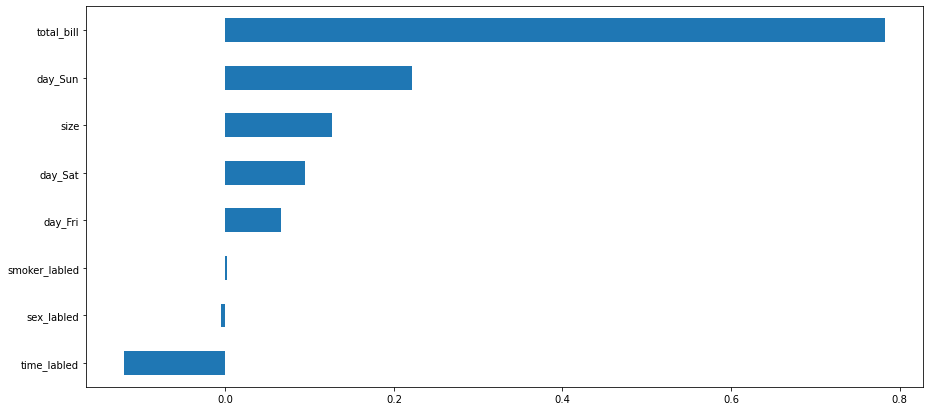

In [79]:
base_model.params[1:].sort_values().plot(kind='barh')

In [80]:
x_test_s = sc.fit_transform(x_test)

In [81]:
X_t = sm.add_constant(x_test_s)

In [82]:
y_pred = base_model.predict(X_t)

In [83]:
from sklearn.metrics import r2_score,mean_squared_error

In [84]:
y_pred_train = base_model.predict(X)

In [85]:
rmse_train = (mean_squared_error(y_train,y_pred_train))**0.5

In [86]:
rmse_train

1.0197702826718327

In [87]:
rmse_test = (mean_squared_error(y_test,y_pred))**0.5

In [88]:
rmse_test

1.005920839895075

In [89]:
r2_score(y_test,y_pred)

0.5410025429253501

<AxesSubplot:ylabel='Density'>

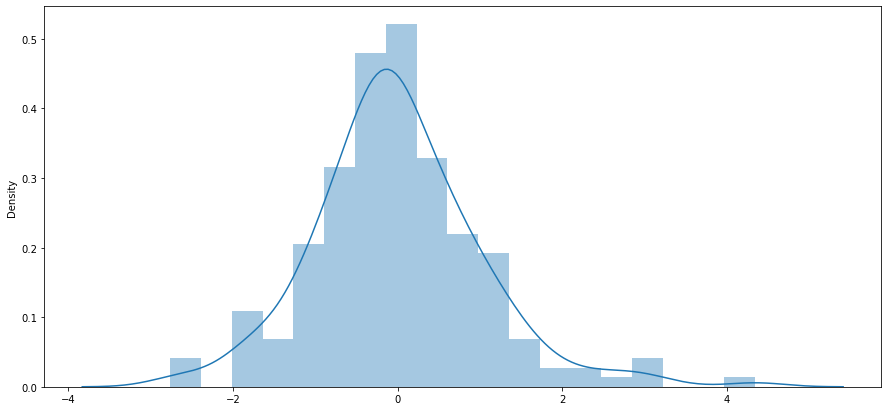

In [90]:
sns.distplot(base_model.resid)

In [91]:
from statsmodels.graphics.gofplots import qqplot

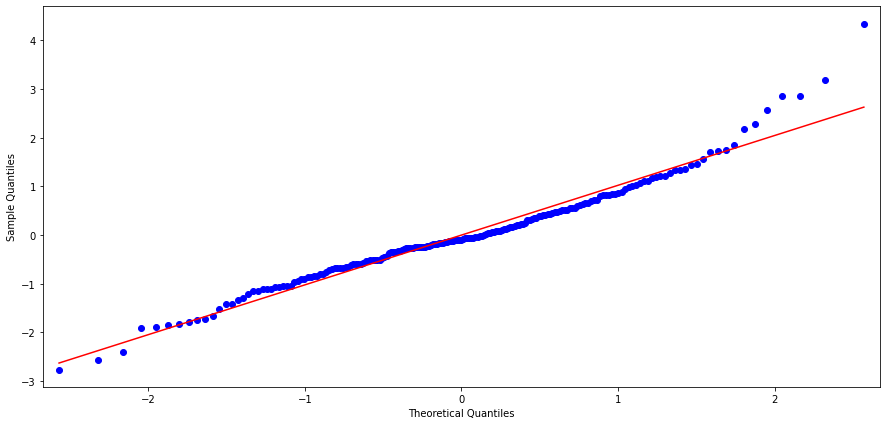

In [92]:
qqplot(base_model.resid,line='r')
plt.show()

In [93]:
base_model.resid.skew()

0.6112265020273794

In [94]:
base_model.resid.kurt()

2.024927630677893

## Model with Variable Tranformation

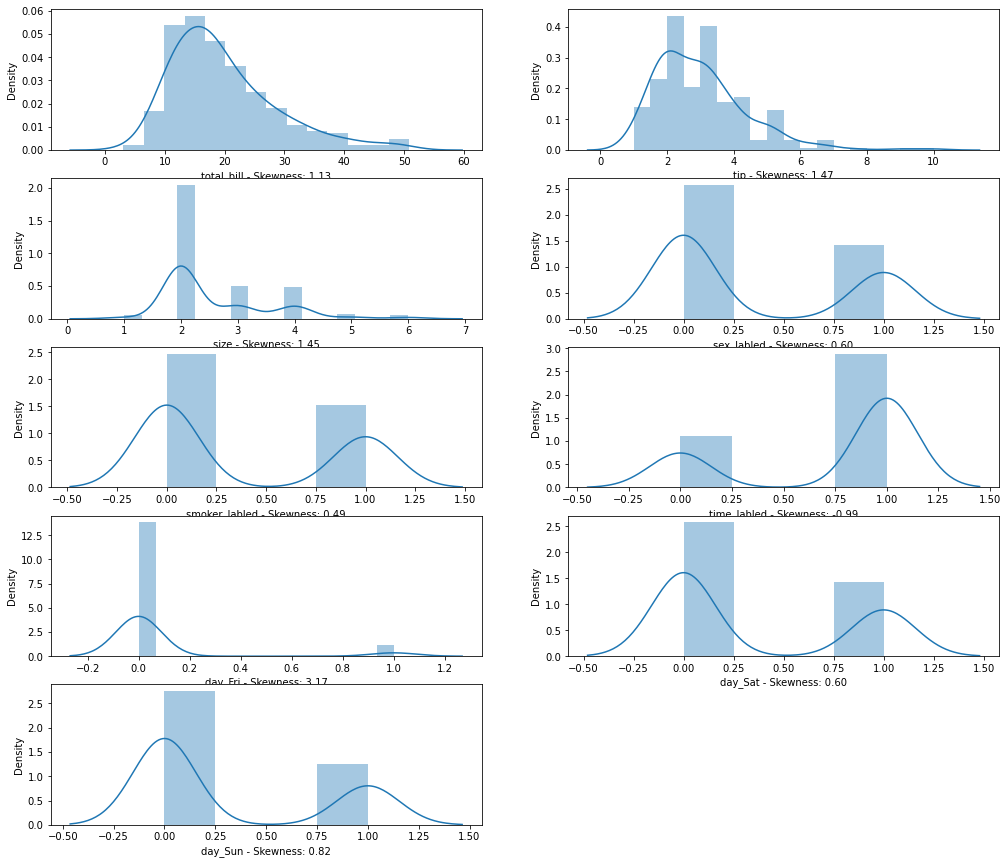

In [95]:
plt.figure(figsize=(17,15))
t=1
for i in df.select_dtypes(include=np.number).columns:
    
    plt.subplot(5,2,t)
    sns.distplot(df[i])
    plt.xlabel('%s - Skewness: %.2f'%(i,df[i].skew()))
    t=t+1

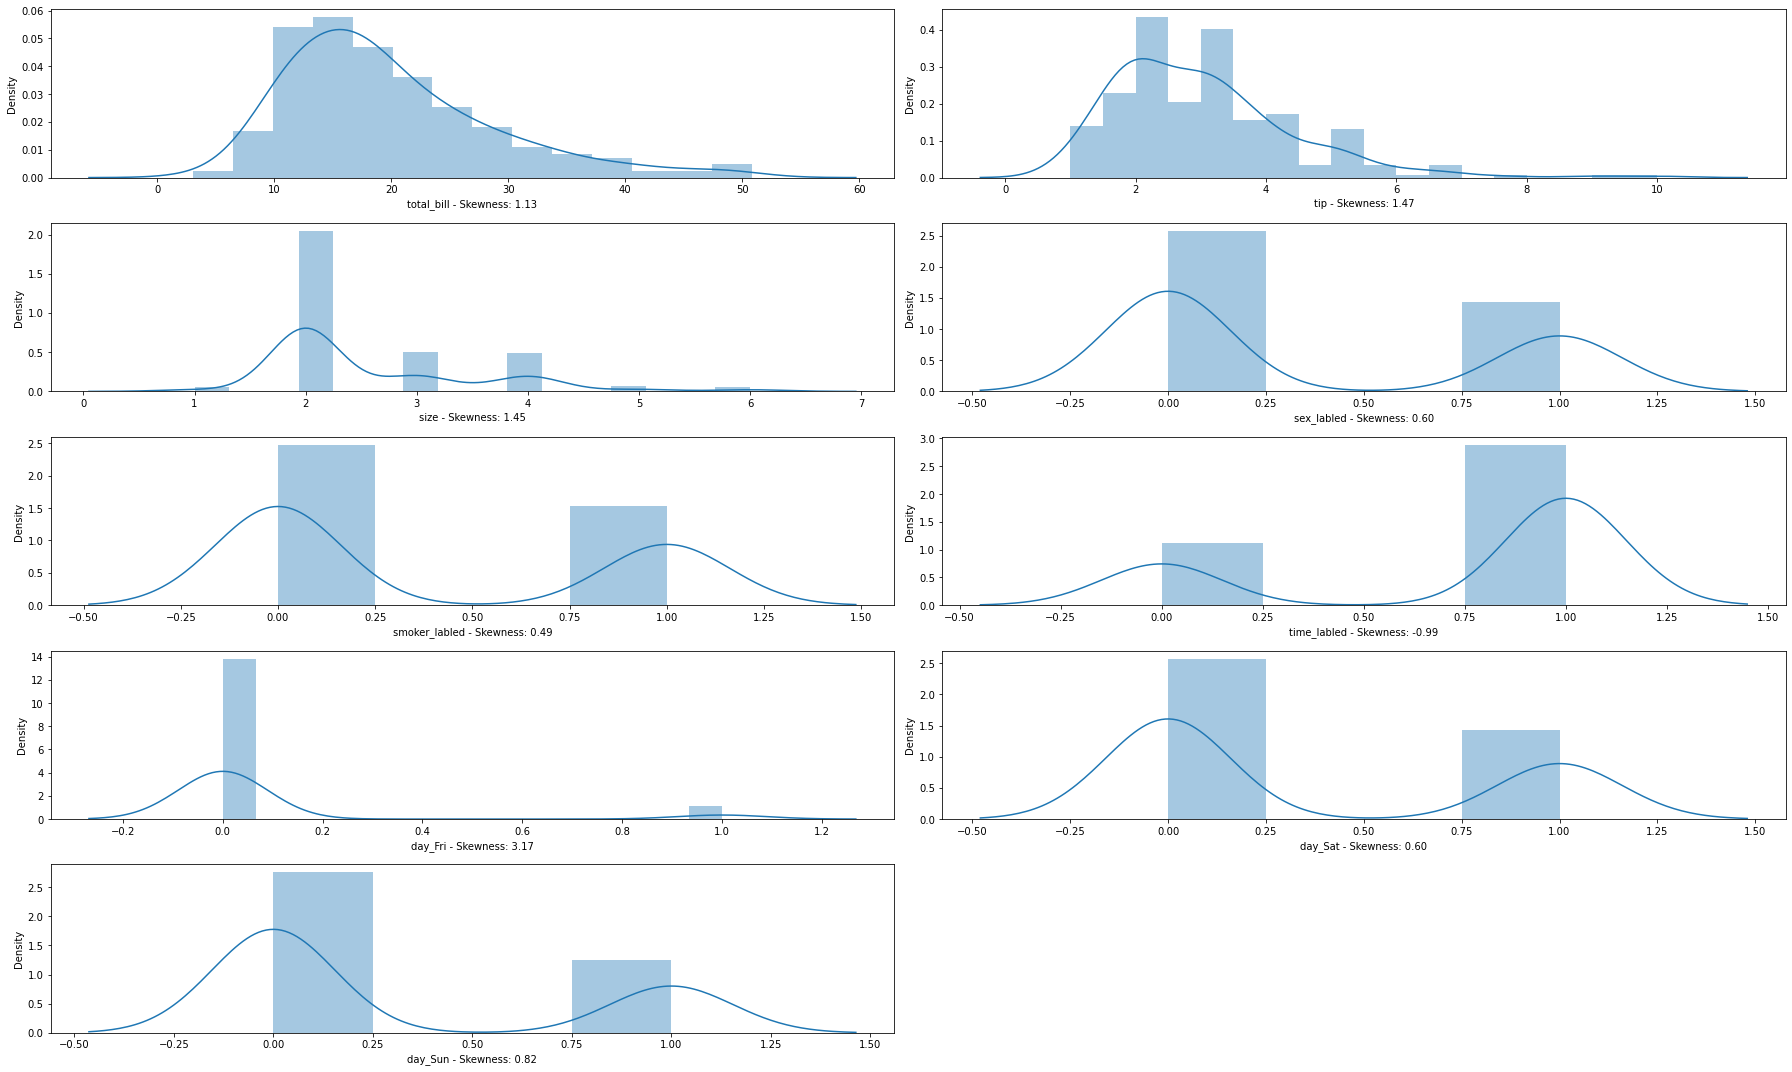

In [100]:
plt.figure(figsize=(25,15))
t=1
for i in df.select_dtypes(include=np.number).columns:
    
    plt.subplot(5,2,t)
    sns.distplot(df[i])
    plt.xlabel('%s - Skewness: %.2f'%(i,df[i].skew()))
    t=t+1
plt.tight_layout()
plt.show()

## Let us Try some Other Models

In [101]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold

In [102]:
x_train

,total_bill,size,sex_labled,smoker_labled,time_labled,day_Fri,day_Sat,day_Sun
144,16.43,2,1,0,0,0,0,0
154,19.77,4,0,0,1,0,0,1
184,40.55,2,0,1,1,0,0,1
161,12.66,2,0,0,1,0,0,1
44,30.40,4,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
22,15.77,2,1,0,1,0,1,0
72,26.86,2,1,1,1,0,1,0
237,32.83,2,0,1,1,0,1,0
15,21.58,2,0,0,1,0,0,1


In [103]:
def model_result(model,x_train,y_train,x_test,y_test):
    print(str(model))
    n = x_train.shape[0]
    p = x_train.shape[1]
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('R2:\t',r2)
    print('Adj R2:\t',adj_r2)
    print('MSE:\t',mean_squared_error(y_test,y_pred))
    print('RMSE:\t',mean_squared_error(y_test,y_pred)**0.5,'\n')

In [104]:
kf = KFold(n_splits=2)

In [105]:
for train,test in kf.split(x_train_s,y_train):
    x_tr,x_te = x_train.iloc[train,:],x_train.iloc[test,:]
    y_tr,y_te = y_train.iloc[train,:],y_train.iloc[test,:]
    model_result(LinearRegression(),x_tr,y_tr,x_te,y_te)

LinearRegression()
R2:	 0.10256368815987371
Adj R2:	 0.020978568901680372
MSE:	 1.331902171801696
RMSE:	 1.1540806608732752 

LinearRegression()
R2:	 0.39903066501534157
Adj R2:	 0.34501094951110256
MSE:	 1.294477753624989
RMSE:	 1.1377511826515447 



In [106]:
model_result(LinearRegression(),x_train_s,y_train,x_test_s,y_test)
model_result(SGDRegressor(),x_train_s,y_train,x_test_s,y_test)
model_result(Ridge(alpha=0.1),x_train_s,y_train,x_test_s,y_test)
model_result(ElasticNet(alpha=0.1,l1_ratio=0.2),x_train_s,y_train,x_test_s,y_test)

LinearRegression()
R2:	 0.5410025429253502
Adj R2:	 0.5212607168146126
MSE:	 1.011876736135213
RMSE:	 1.005920839895075 

SGDRegressor()
R2:	 0.5427585143265887
Adj R2:	 0.5230922138675173
MSE:	 1.0080056327492457
RMSE:	 1.0039948370132417 

Ridge(alpha=0.1)
R2:	 0.5410355623346718
Adj R2:	 0.5212951564135824
MSE:	 1.011803943635781
RMSE:	 1.005884657222577 

ElasticNet(alpha=0.1, l1_ratio=0.2)
R2:	 0.5311257402210585
Adj R2:	 0.5109591053918567
MSE:	 1.0336505101067859
RMSE:	 1.0166860430372722 



In [107]:
for train,test in kf.split(x_train_s,y_train):
    print(train)
    print(test)

[ 98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97]
[ 98 

## Grid Search CV

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param = {'alpha':[0.001,0.01,0.1,1,10,100],
             'fit_intercept':[True,False]}

In [110]:
gscv = GridSearchCV(estimator=Ridge(),param_grid=param,
                   scoring='r2',
                   cv=3,
                   verbose=3)

In [111]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ...alpha=0.001, fit_intercept=True;, score=0.098 total time=   0.0s
[CV 2/3] END ...alpha=0.001, fit_intercept=True;, score=0.378 total time=   0.0s
[CV 3/3] END ...alpha=0.001, fit_intercept=True;, score=0.433 total time=   0.0s
[CV 1/3] END ..alpha=0.001, fit_intercept=False;, score=0.129 total time=   0.0s
[CV 2/3] END ..alpha=0.001, fit_intercept=False;, score=0.321 total time=   0.0s
[CV 3/3] END ..alpha=0.001, fit_intercept=False;, score=0.414 total time=   0.0s
[CV 1/3] END ....alpha=0.01, fit_intercept=True;, score=0.098 total time=   0.0s
[CV 2/3] END ....alpha=0.01, fit_intercept=True;, score=0.378 total time=   0.0s
[CV 3/3] END ....alpha=0.01, fit_intercept=True;, score=0.433 total time=   0.0s
[CV 1/3] END ...alpha=0.01, fit_intercept=False;, score=0.129 total time=   0.0s
[CV 2/3] END ...alpha=0.01, fit_intercept=False;, score=0.321 total time=   0.0s
[CV 3/3] END ...alpha=0.01, fit_intercept=False;

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False]},
             scoring='r2', verbose=3)

In [112]:
gscv.best_params_

{'alpha': 100, 'fit_intercept': True}

In [113]:
gscv.best_score_

0.3602319397271378

In [114]:
model_ridge = Ridge(**gscv.best_params_)

In [115]:
model_ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [116]:
model_ridge.score(x_test,y_test)

0.5804698842015223